Extract the drugscom_review.csv from drugscom.csv

In [2]:
import pandas as pd
# Load the CSV file into a DataFrame
data_frame = pd.read_csv('drugscom.csv')
# Access a specific column by column name
column_data =data_frame ['Review']
# Save the column data to a new CSV file
column_data.to_csv('drugscom_review.csv', index=False)
print(column_data.to_csv)

<bound method NDFrame.to_csv of 0      Lipitor (atorvastatin) for High Cholesterol \t...
1      Lipitor (atorvastatin) for High Cholesterol \t...
2                                                    NaN
3      Lipitor (atorvastatin) for High Cholesterol \t...
4      Lipitor (atorvastatin) for High Cholesterol \t...
                             ...                        
376    Lipitor (atorvastatin) for High Cholesterol \t...
377    For High Cholesterol \t\t\t\t\t\t\t"Never had ...
378    Lipitor (atorvastatin) for Prevention of Cardi...
379    For High Cholesterol \t\t\t\t\t\t\t"Started th...
380    Lipitor (atorvastatin) for High Cholesterol \t...
Name: Review, Length: 381, dtype: object>


print first 10 ADR in output.csv

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('output.csv')

# Extract the drug_rec_act values into a list
adverse_effects = df['drug_rec_act'].tolist()

# Convert all list items to lowercase and remove duplicates
adverse_effects_lower = list(set([effect.lower() for effect in adverse_effects]))

print(adverse_effects_lower[:10])


['myelofibrosis', 'breast cancer male', 'onychoclasis', 'product lot number issue', 'platelet anisocytosis', 'pseudohypoglycaemia', 'temporomandibular joint surgery', 'hepatic pain', 'vaccination site cellulitis', 'arboviral infection']


number of unique and non-empty reviews

In [2]:
# Read the CSV file
df = pd.read_csv('drugscom_review.csv')

# Extract the reviews into a list
reviews = df['Review'].tolist()

# Step 1: Remove Duplicate Entries
unique_reviews = list(set(reviews))

# Step 2: Remove Empty Entries and Non-String Values
cleaned_reviews = [str(review).strip() for review in unique_reviews if isinstance(review, str) and review.strip() != '']

# Print the number of initial and cleaned reviews
print(f"Initial number of reviews: {len(reviews)}")
print(f"Number of unique and non-empty reviews: {len(cleaned_reviews)}")

# Save the cleaned reviews back to the CSV
cleaned_df = pd.DataFrame({'Review': cleaned_reviews})
cleaned_df.to_csv('cleaned_drugscom_review.csv', index=False)


Initial number of reviews: 381
Number of unique and non-empty reviews: 277


print first cleaned review

In [3]:
# Print the first review
print(cleaned_reviews[0])
print(cleaned_reviews[1])
print(type(cleaned_reviews[0]))

Lipitor (atorvastatin) for High Cholesterol, Familial Heterozygous 							"Have been using it for over 10 years.  No problems at a dose of 10mg.  Works well when combined with Ezetrol"
Lipitor (atorvastatin) for High Cholesterol 							"I have been on Lipitor for 6 months. My cholesterol went down from 220 to 156, I was tested 2 months ago, therefore I hope it is going down. Fortunately, I don't have any side effect, Thank goodness."
<class 'str'>


Number of reviews containing ADRs

In [7]:
# Create a list to store reviews containing ADRs
reviews_with_adrs = []

# Create a Counter to store ADR frequencies
from collections import Counter
adr_frequency_counter = Counter()

# Iterate through cleaned reviews and check for ADRs
for review in cleaned_reviews:
    found_adrs = []
    for adr in adverse_effects_lower:
        if adr in review:
            found_adrs.append(adr)
            adr_frequency_counter[adr] += 1
    if found_adrs:
        reviews_with_adrs.append((review, found_adrs))

# Print the number of reviews containing ADRs
print(f"Number of reviews containing ADRs: {len(reviews_with_adrs)}")

# Create a list of ADRs with their frequencies
adr_frequencies = list(adr_frequency_counter.items())

Number of reviews containing ADRs: 203


extract the ADRs  and frequencies from data and show as a scatter plot

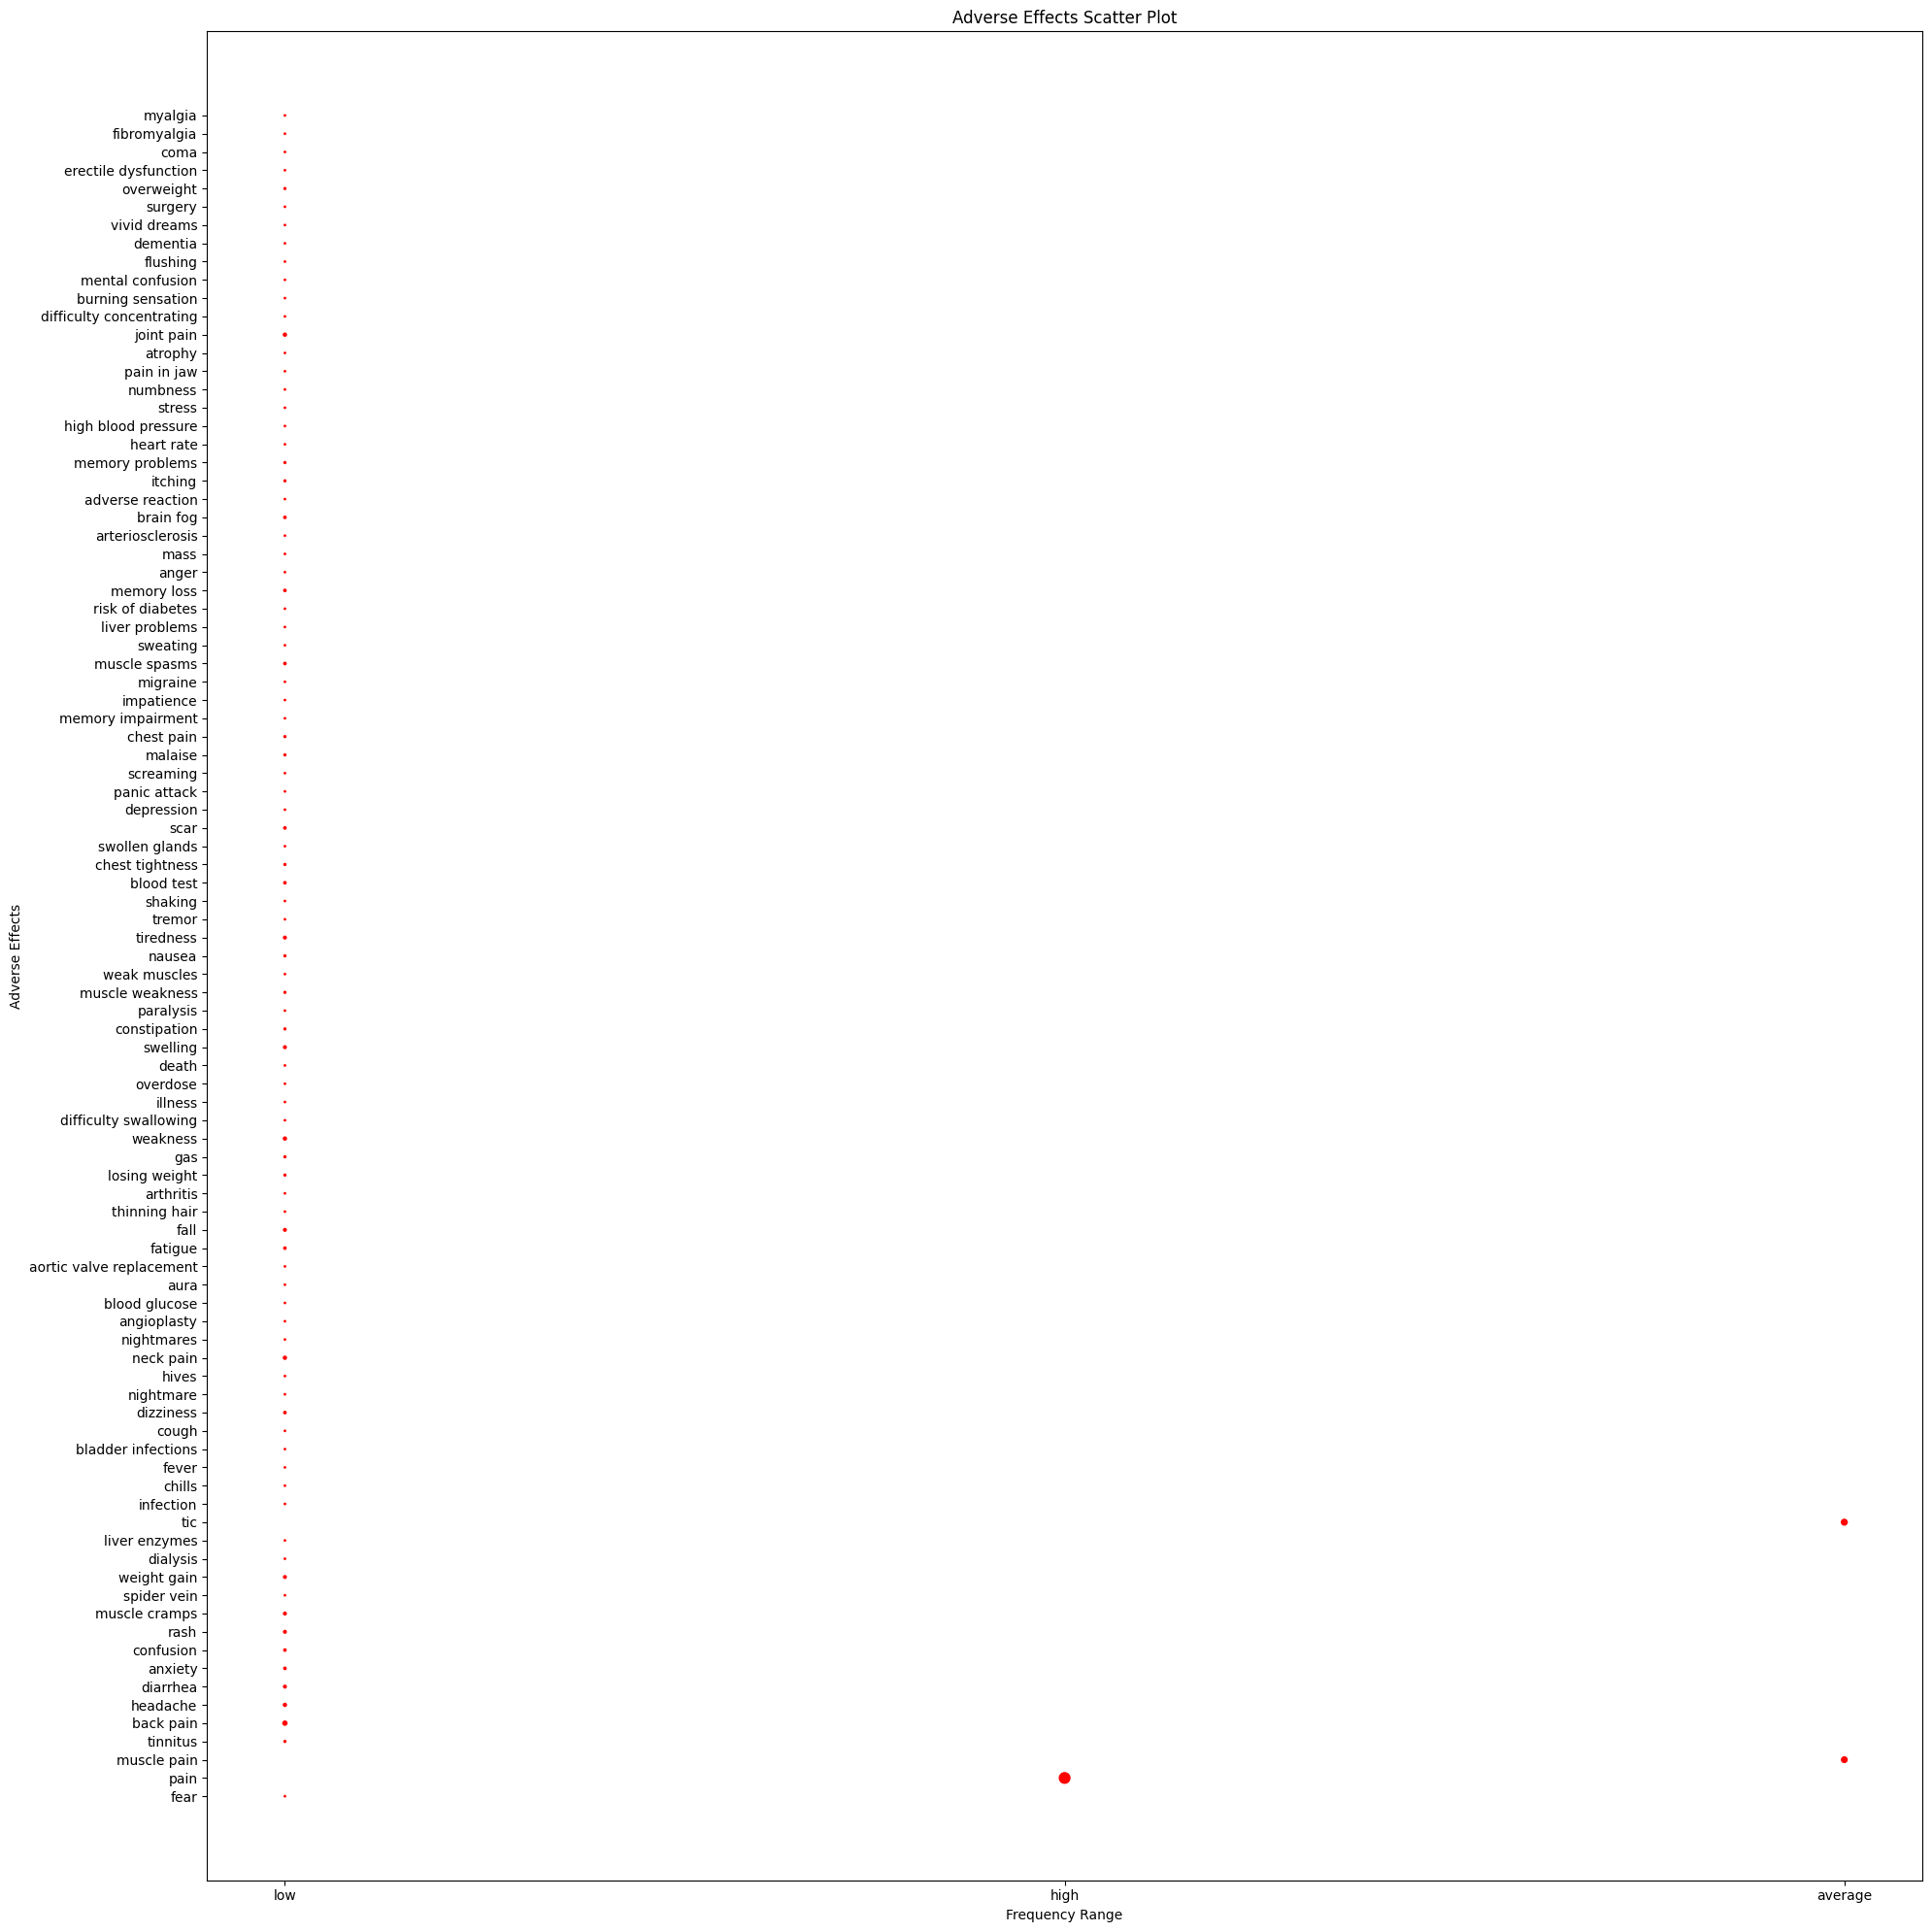

In [37]:
# Extract ADRs and frequencies from the data
adrs, frequencies = zip(*adr_frequencies)

# Define the ranges for low, average, and high frequencies
low_range = 10
high_range = 20

# Categorize ADRs based on frequency
adr_categories = ['low' if freq <= low_range else 'average' if low_range < freq <= high_range else 'high' for freq in frequencies]

# Create a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(adr_categories, adrs, s=frequencies, color='red', alpha=1)
plt.xlabel('Frequency Range')
plt.ylabel('Adverse Effects')
plt.title('Adverse Effects Scatter Plot')
plt.xticks(['low', 'average', 'high'])
plt.tight_layout()

# Display the scatter plot
plt.show()

ADRs and frequencies data show as a wordcloud

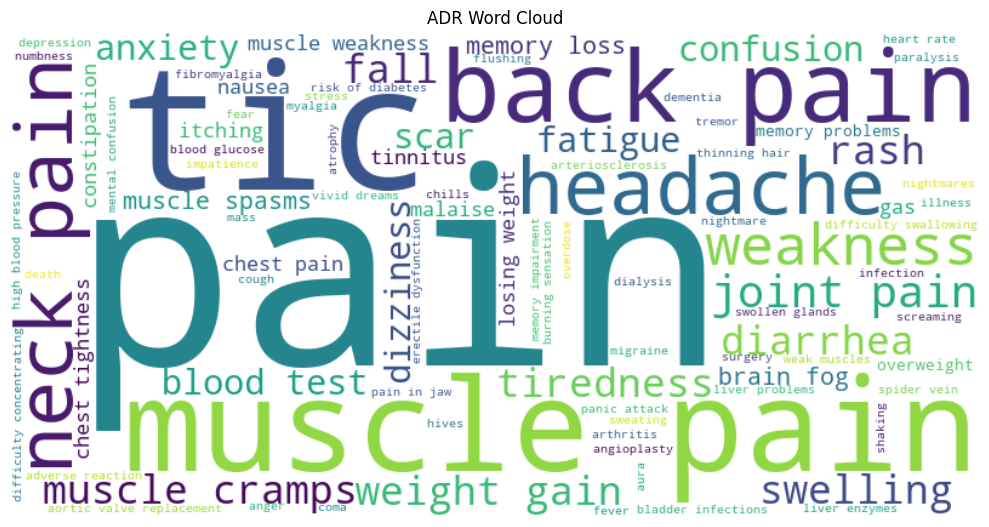

In [38]:
# Create a dictionary from the list of tuples
adr_freq_dict = dict(adr_frequencies)

# Create a WordCloud instance
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(adr_freq_dict)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('ADR Word Cloud')
plt.tight_layout()

# Display the WordCloud
plt.show()

ADRs and frequency show as a prettytable

In [22]:
from prettytable import PrettyTable

# Extract ADRs and frequencies from the Counter
adrs, frequencies = zip(*adr_frequencies)

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ["Adverse Effect", "Frequency"]

# Add data to the table
for adr, frequency in zip(adrs, frequencies):
    table.add_row([adr, frequency])

# Set the column alignment to left
table.align["Adverse Effect"] = "l"
table.align["Frequency"] = "l"

# Print the table
print(table)

+--------------------------+-----------+
| Adverse Effect           | Frequency |
+--------------------------+-----------+
| milia                    | 14        |
| muscle pain              | 32        |
| allergies                | 3         |
| pain                     | 103       |
| angioplasty              | 1         |
| abdominal cramps         | 2         |
| nausea                   | 10        |
| brain fog                | 2         |
| nightmare                | 5         |
| plague                   | 2         |
| tic                      | 38        |
| hives                    | 4         |
| rash                     | 7         |
| fibromyalgia             | 1         |
| myalgia                  | 1         |
| colonoscopy              | 1         |
| bone pain                | 1         |
| swelling                 | 3         |
| paralysis                | 1         |
| anxiety                  | 3         |
| muscle cramps            | 9         |
| anger         

ADRs and frequencies show as a barplot

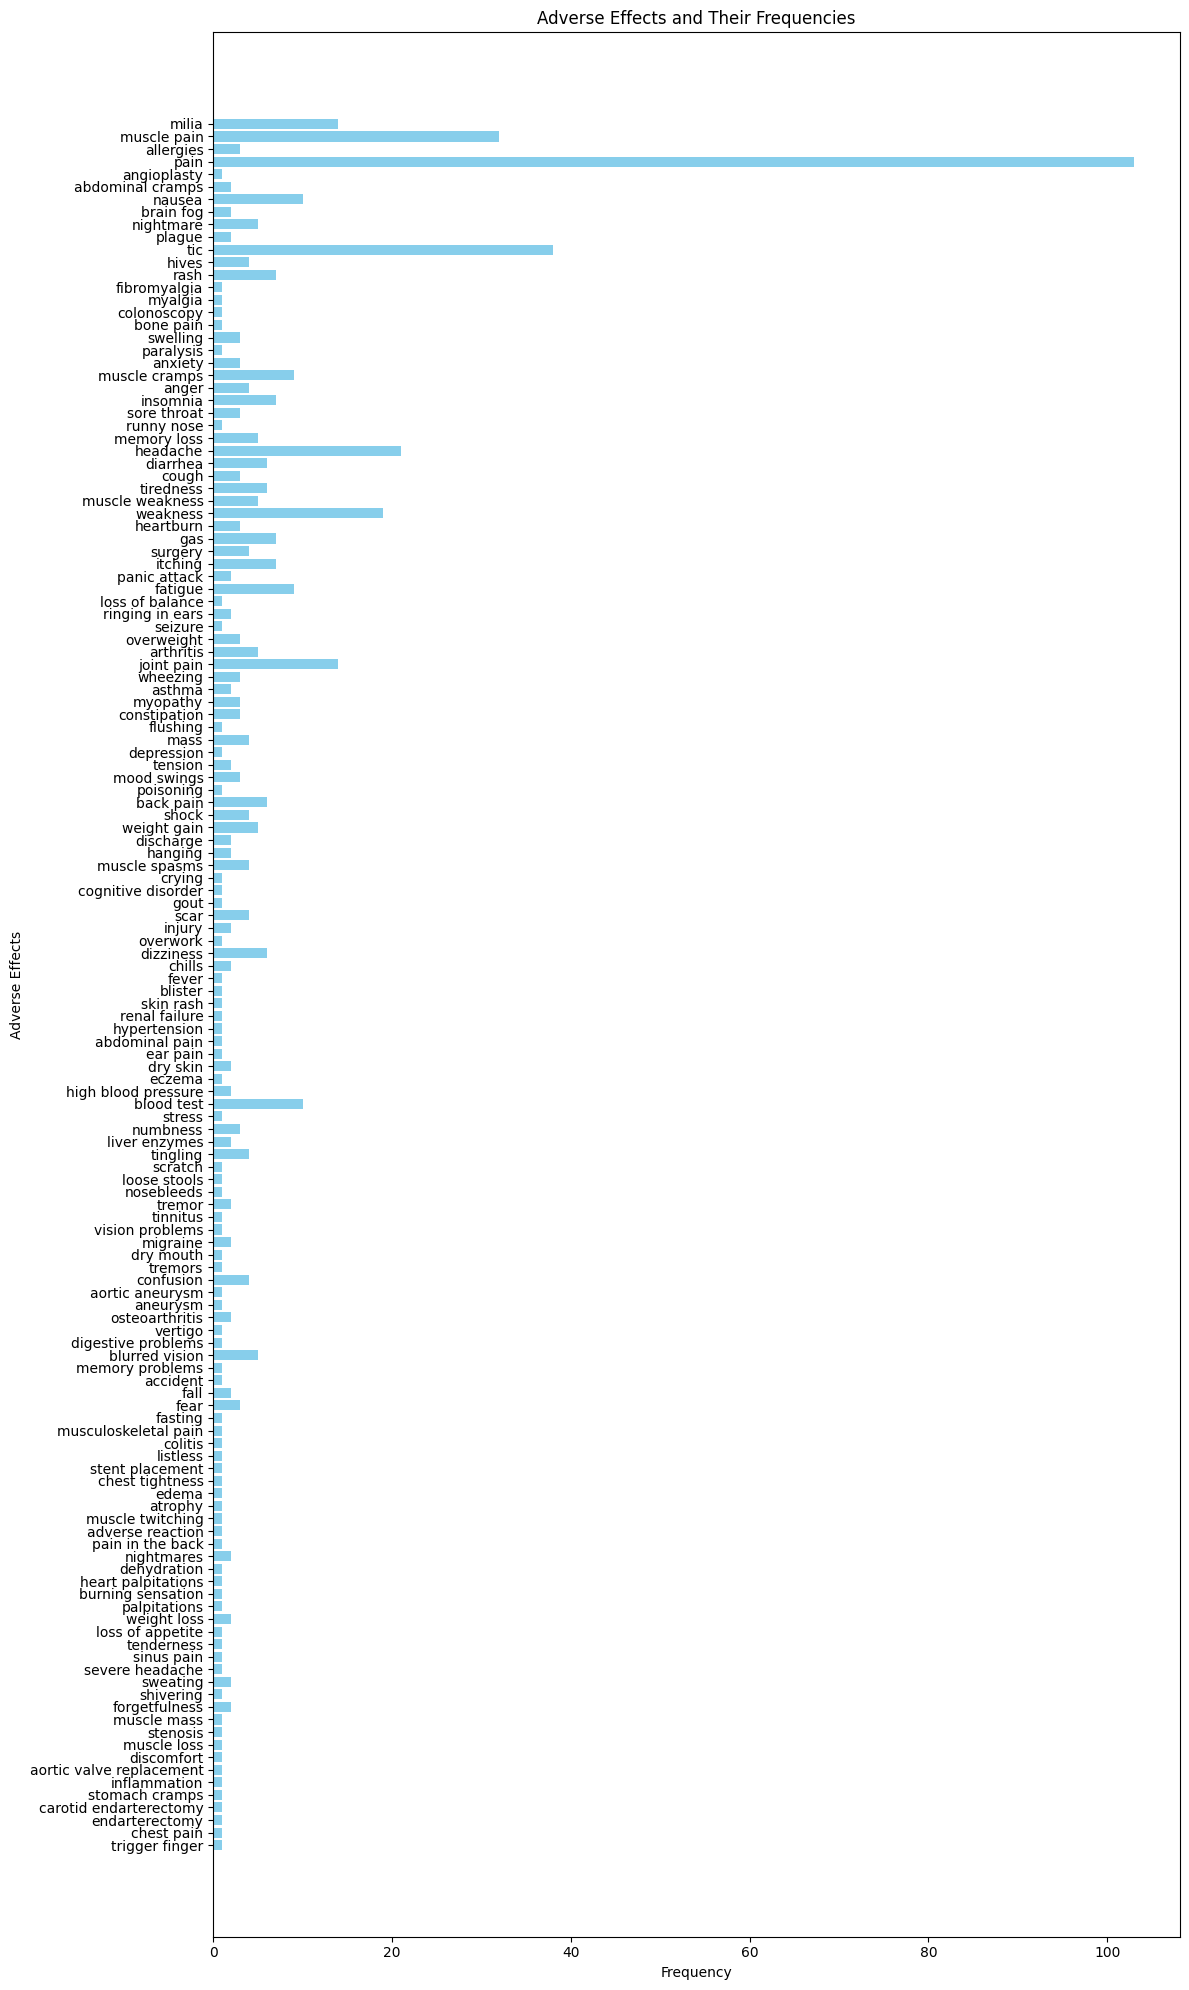

In [23]:
# Extract ADRs and frequencies from the Counter
adrs, frequencies = zip(*adr_frequencies)

# Create a bar plot for all ADRs and their frequencies
plt.figure(figsize=(12, 20))
plt.barh(adrs, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Adverse Effects')
plt.title('Adverse Effects and Their Frequencies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest frequency on top
plt.tight_layout()

# Display the plot
plt.show()

Extract the webmd_review.csv from webmdcom.csv

In [20]:
import pandas as pd
# Load the CSV file into a DataFrame
data_frame = pd.read_csv('webmdcom.csv')
# Access a specific column by column name
column_data = data_frame['Review']
# Save the column data to a new CSV file
column_data.to_csv('webmd_review.csv', index=False)
print(column_data.to_csv)


<bound method NDFrame.to_csv of 0      I was diagnosed with high cholesterol, HDL low...
1      No issue so far. I don't have high cholesterol...
2      I started taking this drug 3 weeks ago and rig...
3      While this medicine lowered my total cholester...
4      Atorvastatin has caused inflamation to the bil...
                             ...                        
184    Gave someone i know type 2 diabetes which caus...
185    I have arteriosclerosis but low cholesterol.  ...
186    PLEASE DO NOT TAKE THIS MEDICATION, have docto...
187    I ceased taking 10mg generic atorvastatin afte...
188    This medication sent me to the ER by ambulance...
Name: Review, Length: 189, dtype: object>


print first 10 ADR in output.csv

In [24]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('output.csv')

# Extract the drug_rec_act values into a list
adverse_effects = df['drug_rec_act'].tolist()

# Convert all list items to lowercase and remove duplicates
adverse_effects_lower = list(set([effect.lower() for effect in adverse_effects]))

print(adverse_effects_lower[:10])


['myelofibrosis', 'breast cancer male', 'onychoclasis', 'product lot number issue', 'platelet anisocytosis', 'pseudohypoglycaemia', 'temporomandibular joint surgery', 'hepatic pain', 'vaccination site cellulitis', 'arboviral infection']


number of unique and non-empty reviews

In [26]:
# Read the CSV file
df = pd.read_csv('webmd_review.csv')

# Extract the reviews into a list
reviews = df['Review'].tolist()

# Step 1: Remove Duplicate Entries
unique_reviews = list(set(reviews))

# Step 2: Remove Empty Entries and Non-String Values
cleaned_reviews = [str(review).strip() for review in unique_reviews if isinstance(review, str) and review.strip() != '']

# Print the number of initial and cleaned reviews
print(f"Initial number of reviews: {len(reviews)}")
print(f"Number of unique and non-empty reviews: {len(cleaned_reviews)}")

# Save the cleaned reviews back to the CSV
cleaned_df = pd.DataFrame({'Review': cleaned_reviews})
cleaned_df.to_csv('cleaned_webmd_review.csv', index=False)


Initial number of reviews: 189
Number of unique and non-empty reviews: 174


print first cleaned review

In [28]:
# Print the first review
print(cleaned_reviews[0])
print(cleaned_reviews[1])
print(type(cleaned_reviews[0]))

Side effects worse than any benefits and, no,  media reports haven't influenced my decision to stop taking Lipitor. Lowering cholesterol is no benefit when I am nauseous and faecally incontinent to the point I fear any outdoor activity. None of this after 2 weeks abstaining from Lipitor. I have no doubts this medication is the right one for many--but not for me-and I haven't consulted my GP yet
I have been on an Atorvastatin as well as BP lowering meds for apprx 3 1/2 years now. My Cholesterol went from about 212 down to 122! This drug works! I have experienced minor muscle aches and pains in my legs but the benefits far outway the side effects. Besides, I have my GF run an Epson Salt bath and soak my aching muscles once every couple of weeks and I'm a happy guy..
<class 'str'>


Number of reviews containing ADRs

In [29]:
# Create a list to store reviews containing ADRs
reviews_with_adrs = []

# Create a Counter to store ADR frequencies
adr_frequency_counter = Counter()

# Iterate through cleaned reviews and check for ADRs
for review in cleaned_reviews:
    found_adrs = []
    for adr in adverse_effects_lower:
        if adr in review:
            found_adrs.append(adr)
            adr_frequency_counter[adr] += 1
    if found_adrs:
        reviews_with_adrs.append((review, found_adrs))

# Print the number of reviews containing ADRs
print(f"Number of reviews containing ADRs: {len(reviews_with_adrs)}")

# Create a list of ADRs with their frequencies
adr_frequencies = list(adr_frequency_counter.items())


Number of reviews containing ADRs: 109


extract the ADRs  and frequencies from data and show as a scatter plot

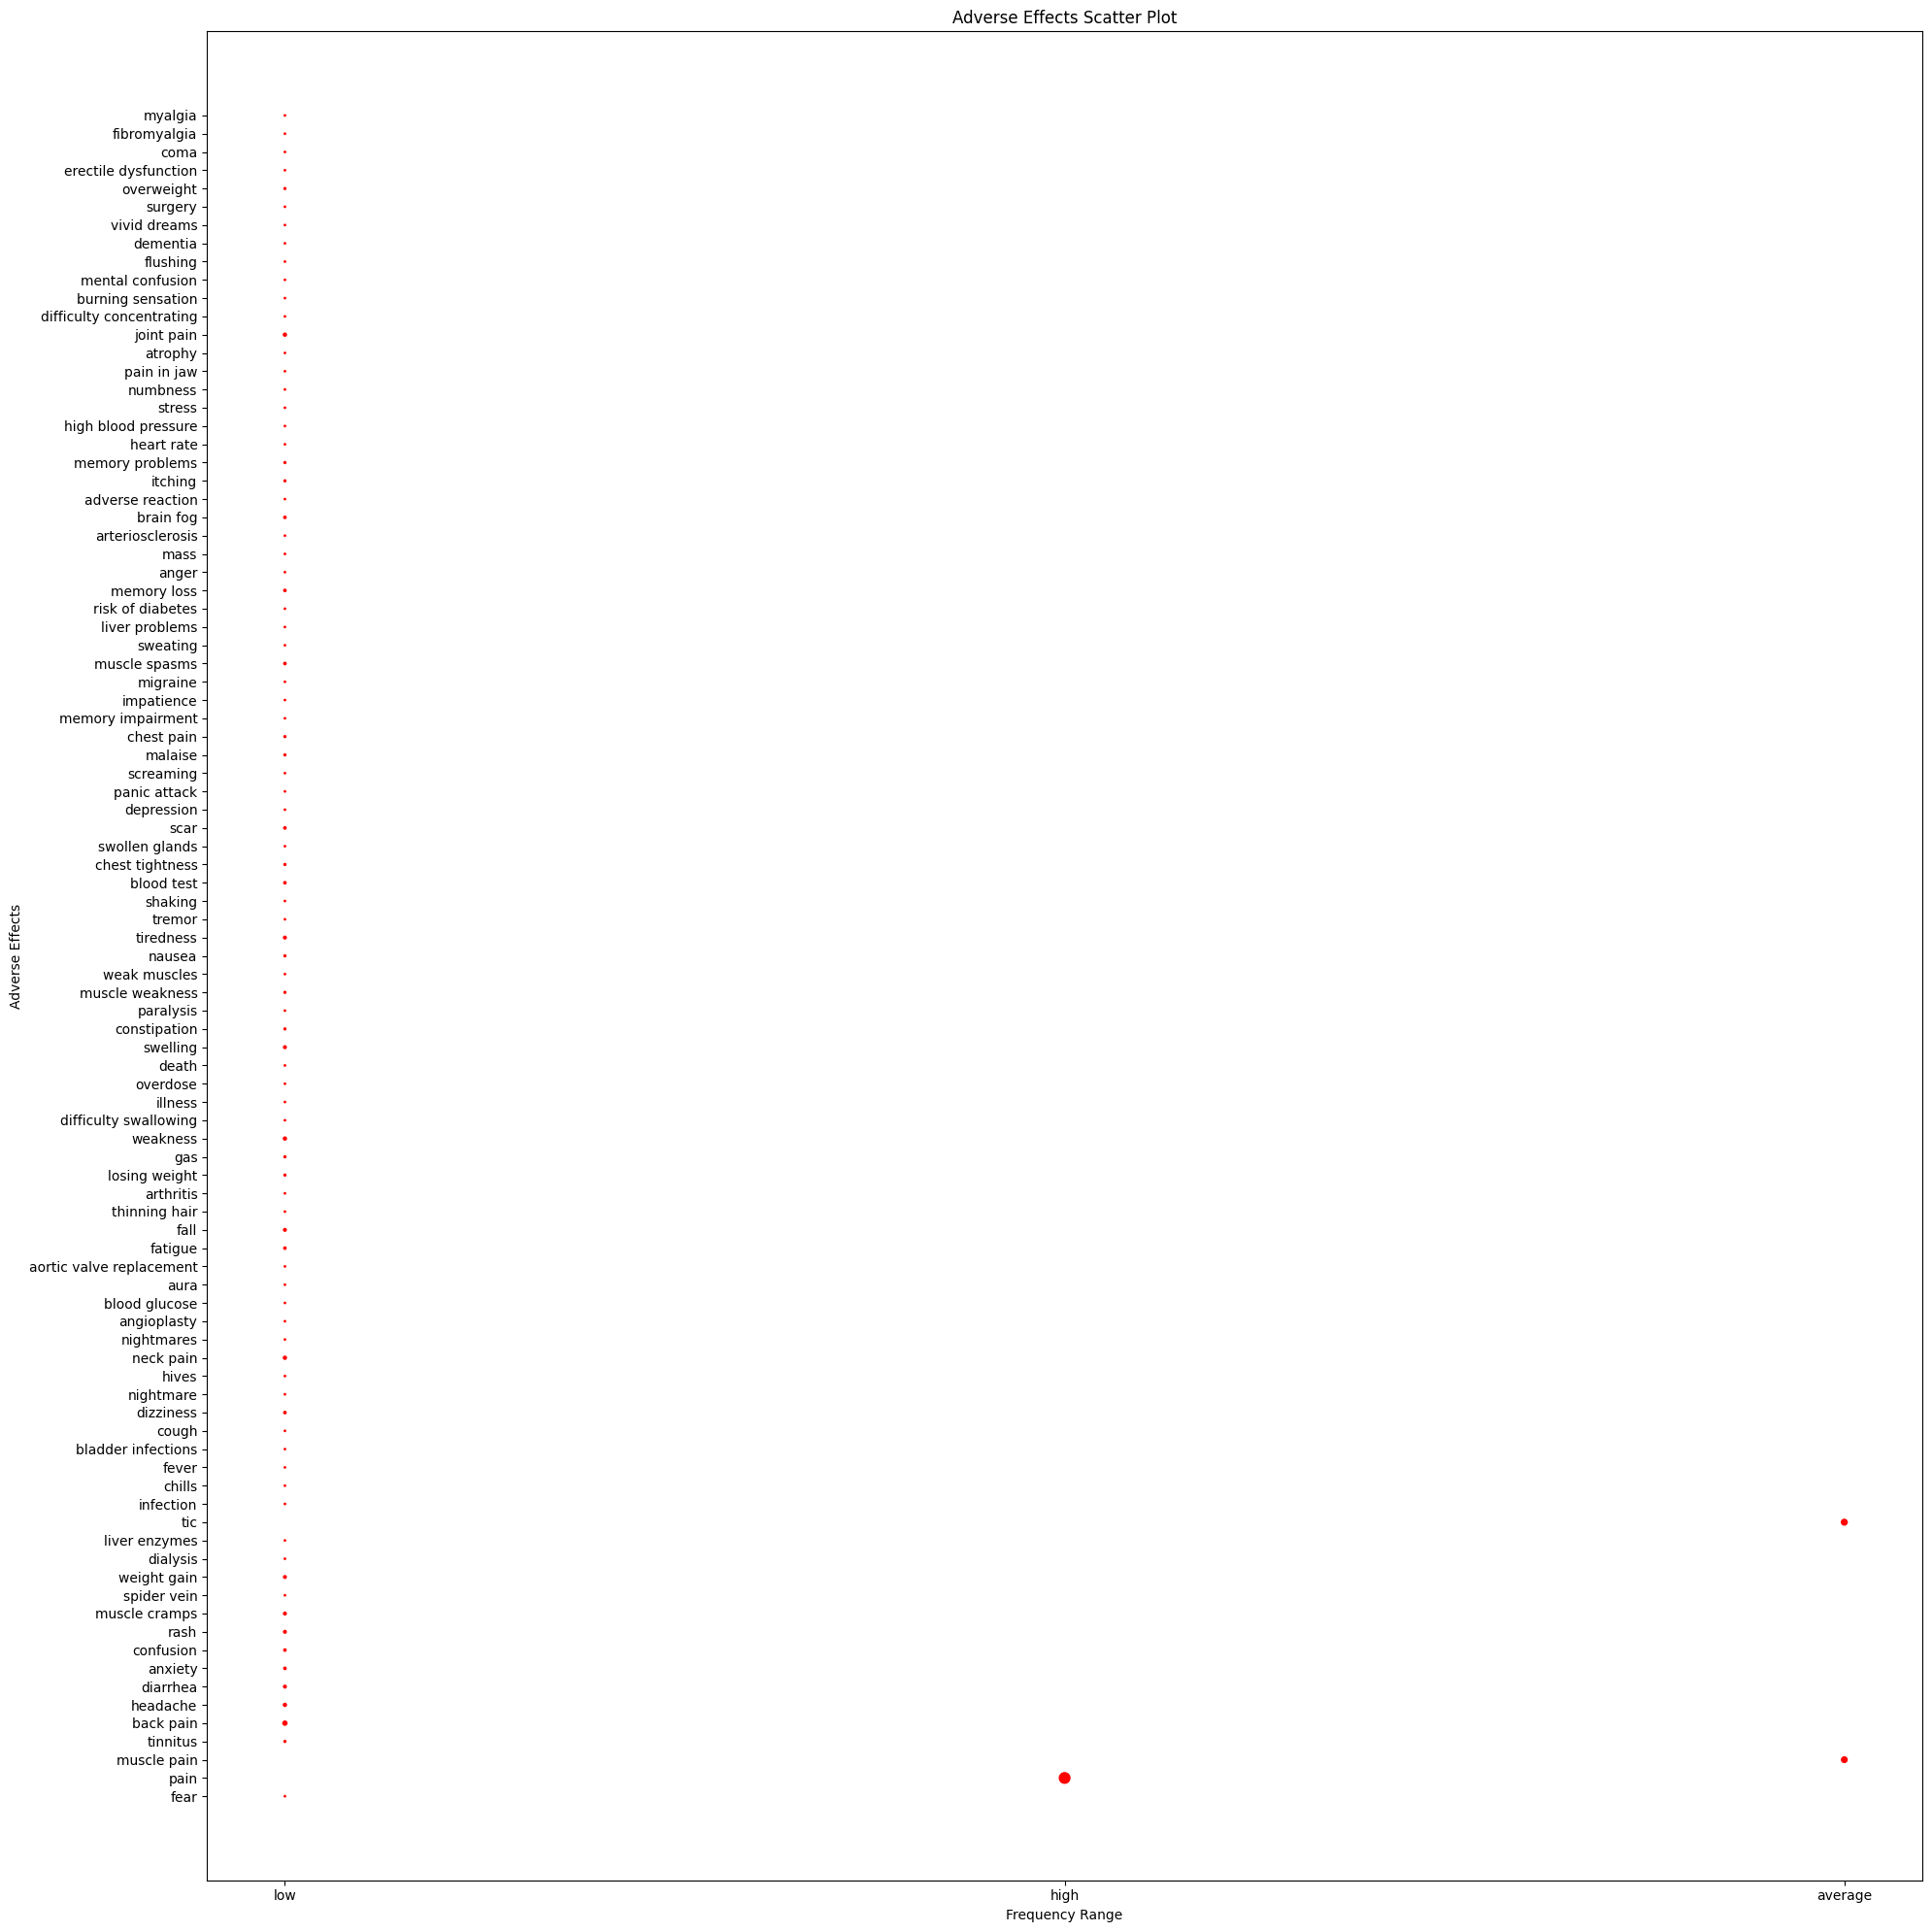

In [31]:
# Extract ADRs and frequencies from the data
adrs, frequencies = zip(*adr_frequencies)

# Define the ranges for low, average, and high frequencies
low_range = 10
high_range = 20

# Categorize ADRs based on frequency
adr_categories = ['low' if freq <= low_range else 'average' if low_range < freq <= high_range else 'high' for freq in frequencies]

# Create a scatter plot
plt.figure(figsize=(20, 20))
plt.scatter(adr_categories, adrs, s=frequencies, color='red', alpha=1)
plt.xlabel('Frequency Range')
plt.ylabel('Adverse Effects')
plt.title('Adverse Effects Scatter Plot')
plt.xticks(['low', 'average', 'high'])
plt.tight_layout()

# Display the scatter plot
plt.show()

ADRs and frequencies data show as a wordcloud

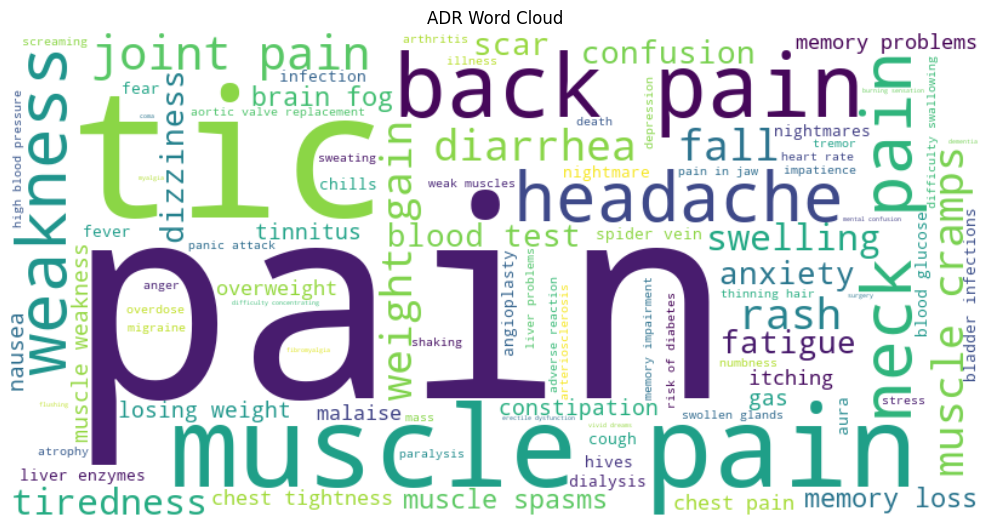

In [32]:
# Create a dictionary from the list of tuples
adr_freq_dict = dict(adr_frequencies)

# Create a WordCloud instance
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(adr_freq_dict)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('ADR Word Cloud')
plt.tight_layout()

# Display the WordCloud
plt.show()

ADRs and frequency show as a prettytable

In [34]:
from prettytable import PrettyTable

# Extract ADRs and frequencies from the Counter
adrs, frequencies = zip(*adr_frequencies)

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ["Adverse Effect", "Frequency"]

# Add data to the table
for adr, frequency in zip(adrs, frequencies):
    table.add_row([adr, frequency])

# Set the column alignment to left
table.align["Adverse Effect"] = "l"
table.align["Frequency"] = "l"

# Print the table
print(table)

+--------------------------+-----------+
| Adverse Effect           | Frequency |
+--------------------------+-----------+
| fear                     | 1         |
| pain                     | 61        |
| muscle pain              | 17        |
| tinnitus                 | 2         |
| back pain                | 9         |
| headache                 | 5         |
| diarrhea                 | 4         |
| anxiety                  | 3         |
| confusion                | 3         |
| rash                     | 4         |
| muscle cramps            | 4         |
| spider vein              | 1         |
| weight gain              | 4         |
| dialysis                 | 1         |
| liver enzymes            | 1         |
| tic                      | 18        |
| infection                | 1         |
| chills                   | 1         |
| fever                    | 1         |
| bladder infections       | 1         |
| cough                    | 1         |
| dizziness     

ADRs and frequencies show as a barplot

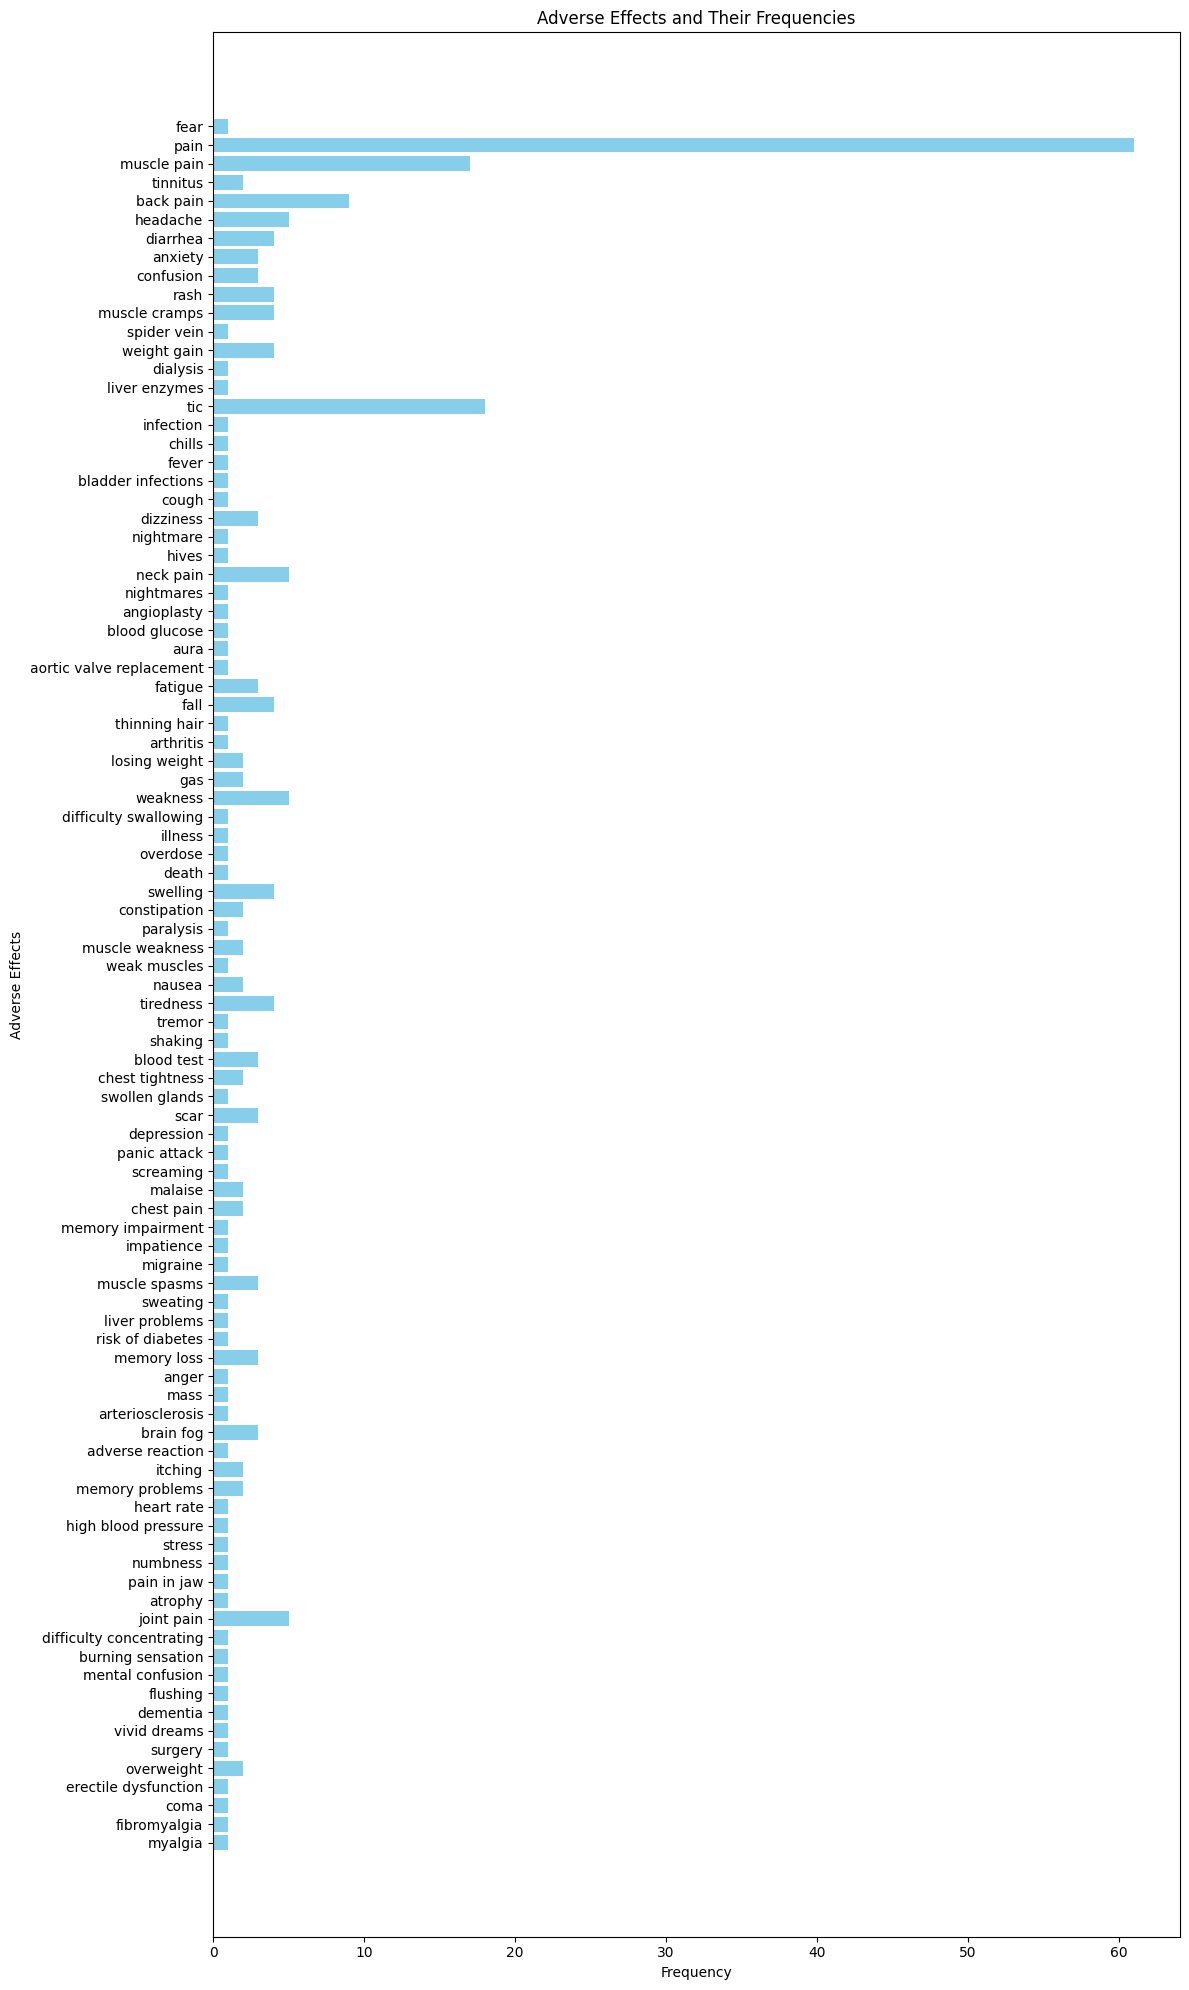

In [36]:
# Extract ADRs and frequencies from the Counter
adrs, frequencies = zip(*adr_frequencies)

# Create a bar plot for all ADRs and their frequencies
plt.figure(figsize=(12, 20))
plt.barh(adrs, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Adverse Effects')
plt.title('Adverse Effects and Their Frequencies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest frequency on top
plt.tight_layout()

# Display the plot
plt.show()

In [35]:
# Extract the reviews into a list
data_frame = pd.read_csv('drugscom.csv')
reviews = data_frame['Review'].tolist()

In [9]:
# Print the first review
print(reviews[0])
print(reviews[1])
print(type(reviews[0]))

Lipitor (atorvastatin) for High Cholesterol 							"So I went to the doctor for peripheral neuropathy and back spasms.  She does my bloodwork and my cholesterol is extremely high.  She puts me on generic Lipitor and it made my back spasms even worse.  Now my upper back has a tremor that still hasn't gone away even after quitting the drug 2 months ago.  I have loss strength in my legs and I  have terrible short term memory. It would give me dizzy spells and I just felt sick all the time.  I'm still recovering from it and I told my doctor I quit taking it because it was making me shake. Now she wants me to start taking it again, but I'm not going to,"
Lipitor (atorvastatin) for High Cholesterol 							"After taking Lipitor for a few weeks I developed pain in both my legs ,arms and shoulders . After three months all my muscles were heavy and under powered I could hardly exercise .  I stopped taking Lipitor and some three months later I am nearly back to normal!
<class 'str'>


In [20]:
#import spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter


In [21]:
# Load spaCy language model
nlp = spacy.load('en_core_web_sm')

In [12]:
# Preprocess the data
processed_data = []

In [13]:
# Iterate over the reviews
# and tokenize the text to remove stopwords and punctuations
# and lemmatize the text
# and convert it to lowercase
# and append it to processed_data
for review in reviews:
    doc = nlp(str(review))
    processed_data.append([token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha])

In [14]:
# Print the first processed review
print(processed_data[0])

['lipitor', 'atorvastatin', 'high', 'cholesterol', 'go', 'doctor', 'peripheral', 'neuropathy', 'spasm', 'bloodwork', 'cholesterol', 'extremely', 'high', 'put', 'generic', 'lipitor', 'spasm', 'bad', 'upper', 'tremor', 'go', 'away', 'quit', 'drug', 'month', 'ago', 'loss', 'strength', 'leg', 'terrible', 'short', 'term', 'memory', 'dizzy', 'spell', 'feel', 'sick', 'time', 'recover', 'tell', 'doctor', 'quit', 'take', 'make', 'shake', 'want', 'start', 'take', 'go']


In [15]:
 #Flatten the processed data
flattened_data = [word for review in processed_data for word in review]

not_suitable_words = ['read', 'drug', 'day', 'mg', 'year', 'month', 'effect', 'stop', 'doctor', 'feel', 'muscle', 'leg',
                      'medication', 'start', 'week', 'take', 'go', 'med', 'have', 'like', 'work', 'time', 'tell',
                      'know', 'ago', 'want', 'try']

# Remove the not suitable words
flattened_data = [word for word in flattened_data if word not in not_suitable_words]

# Print the first 10 words
print(flattened_data[:10])

# Perform bag-of-words analysis
word_freq = Counter(flattened_data)



['lipitor', 'atorvastatin', 'high', 'cholesterol', 'peripheral', 'neuropathy', 'spasm', 'bloodwork', 'cholesterol', 'extremely']


In [12]:
# Perform bag-of-words analysis
word_freq = Counter(flattened_data)
word_freq.most_common(10)

[('cholesterol', 417),
 ('high', 317),
 ('lipitor', 199),
 ('atorvastatin', 190),
 ('pain', 168),
 ('nan', 104),
 ('statin', 70),
 ('bad', 55),
 ('get', 52),
 ('experience', 43)]

In [20]:
import pandas as pd

word_freq = pd.DataFrame(word_freq.most_common(15),
                         columns=['words', 'count'])
word_freq.head()

,words,count
0,cholesterol,417
1,high,317
2,lipitor,199
3,atorvastatin,190
4,pain,168


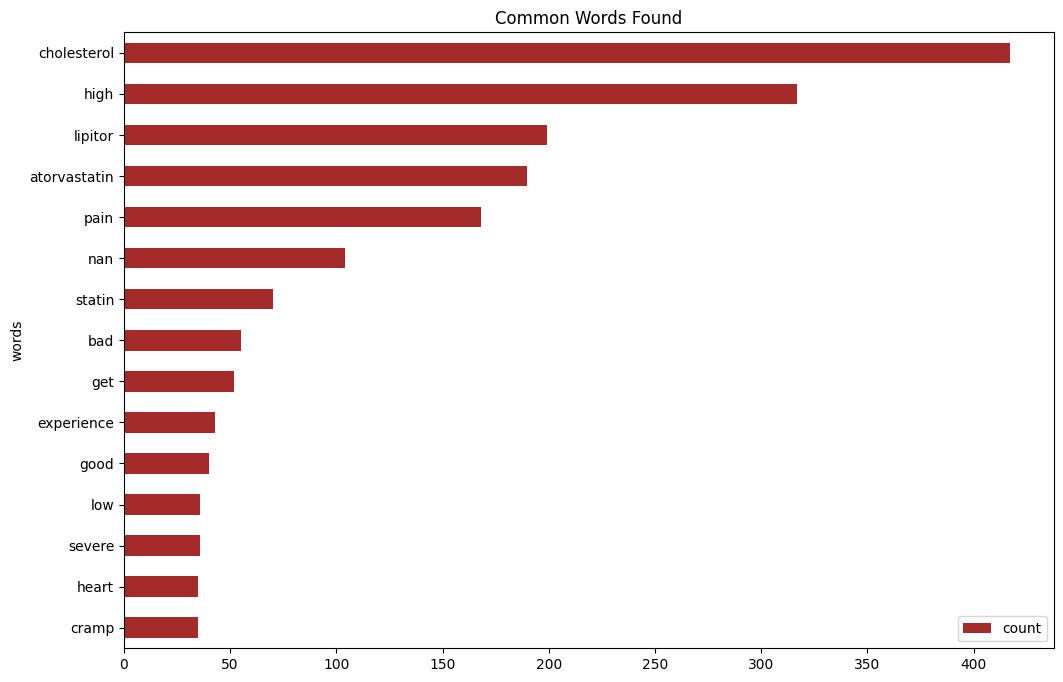

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                                            y='count',
                                            ax=ax,
                                            color="brown")
ax.set_title("Common Words Found")
plt.show()

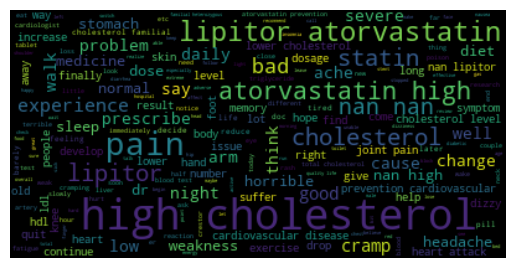

In [22]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(flattened_data))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Extract the reviews into a list
data_frame = pd.read_csv('webmdcom.csv')
reviews = data_frame['Review'].tolist()

In [24]:
# Print the first review
print(reviews[0])
print(reviews[1])
print(type(reviews[0]))

I was diagnosed with high cholesterol, HDL low, LDH? Day 1-100 days: 1 grapefruit/day , exercise (run for 30 minutes=2 miles) & low carbohydrate diet (180 gms/day). Fasting blood test showed Increase HDL by 2.5%, still high cholesterol at 260s.  Day 101: 5 mg/day for one day has caused extreme lightheadedness, tiredness. Stop. Doesn't feel right for my body. Looking for options.
No issue so far. I don't have high cholesterol and don't know how my levels have changed, but I don't have any other issues so far.
<class 'str'>


In [48]:
# import library
import contractions

# creating an empty list
expanded_words = []
for word in reviews[0].split():
    # using contractions.fix to expand the shortened words
    expanded_words.append(contractions.fix(word))

expanded_text = ' '.join(expanded_words)
print('Original text: ' + reviews[0])
print('Expanded_text: ' + expanded_text)

Original text: I was diagnosed with high cholesterol, HDL low, LDH? Day 1-100 days: 1 grapefruit/day , exercise (run for 30 minutes=2 miles) & low carbohydrate diet (180 gms/day). Fasting blood test showed Increase HDL by 2.5%, still high cholesterol at 260s.  Day 101: 5 mg/day for one day has caused extreme lightheadedness, tiredness. Stop. Doesn't feel right for my body. Looking for options.
Expanded_text: I was diagnosed with high cholesterol, HDL low, LDH? Day 1-100 days: 1 grapefruit/day , exercise (run for 30 minutes=2 miles) & low carbohydrate diet (180 gms/day). Fasting blood test showed Increase HDL by 2.5%, still high cholesterol at 260s. Day 101: 5 mg/day for one day has caused extreme lightheadedness, tiredness. Stop. Does not feel right for my body. Looking for options.


In [49]:
#import spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter


In [50]:
# Load spaCy language model
nlp = spacy.load('en_core_web_sm')

In [51]:
# Preprocess the data
processed_data = []

In [52]:
# Iterate over the reviews
# and tokenize the text to remove stopwords and punctuations
# and lemmatize the text
# and convert it to lowercase
# and append it to processed_data
for processed_data in reviews:
    doc = nlp(str(processed_data))
    processed_data.append([token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha])

AttributeError: 'str' object has no attribute 'append'

In [53]:
# Print the first processed review
print(expanded_text[2])

w


In [54]:
# Remove the Python duplicate with its index number: 3
del processed_data[2]
print(processed_data)


TypeError: 'str' object doesn't support item deletion

In [55]:
# initializing list
print("The original list is : "
      + str(processed_data))

# using list comprehension to remove duplicated from list
res = []
[res.append(x) for x in processed_data if x not in res]

# printing list after removal
print ("The list after removing duplicates : "
       + str(res))

The original list is : I was diagnosed with high cholesterol, HDL low, LDH? Day 1-100 days: 1 grapefruit/day , exercise (run for 30 minutes=2 miles) & low carbohydrate diet (180 gms/day). Fasting blood test showed Increase HDL by 2.5%, still high cholesterol at 260s.  Day 101: 5 mg/day for one day has caused extreme lightheadedness, tiredness. Stop. Doesn't feel right for my body. Looking for options.
The list after removing duplicates : ['I', ' ', 'w', 'a', 's', 'd', 'i', 'g', 'n', 'o', 'e', 't', 'h', 'c', 'l', 'r', ',', 'H', 'D', 'L', '?', 'y', '1', '-', '0', ':', 'p', 'f', 'u', '/', 'x', '(', '3', 'm', '=', '2', ')', '&', 'b', '8', '.', 'F', '5', '%', '6', 'S', "'", 'k']


In [56]:
# import library
import contractions

# creating an empty list
expanded_words = []
for word in reviews[0].split():
    # using contractions.fix to expand the shortened words
    expanded_words.append(contractions.fix(word))

expanded_text = ' '.join(expanded_words)
print('Original text: ' + reviews[0])
print('Expanded_text: ' + expanded_text)

Original text: I was diagnosed with high cholesterol, HDL low, LDH? Day 1-100 days: 1 grapefruit/day , exercise (run for 30 minutes=2 miles) & low carbohydrate diet (180 gms/day). Fasting blood test showed Increase HDL by 2.5%, still high cholesterol at 260s.  Day 101: 5 mg/day for one day has caused extreme lightheadedness, tiredness. Stop. Doesn't feel right for my body. Looking for options.
Expanded_text: I was diagnosed with high cholesterol, HDL low, LDH? Day 1-100 days: 1 grapefruit/day , exercise (run for 30 minutes=2 miles) & low carbohydrate diet (180 gms/day). Fasting blood test showed Increase HDL by 2.5%, still high cholesterol at 260s. Day 101: 5 mg/day for one day has caused extreme lightheadedness, tiredness. Stop. Does not feel right for my body. Looking for options.


In [58]:
# Extract the reviews into a list

data_frame = pd.read_csv('webmdcom.csv')
reviews = data_frame['Review'].tolist()

In [28]:
# Print the first review
print(reviews[0])
print(reviews[1])
print(type(reviews[0]))

I was diagnosed with high cholesterol, HDL low, LDH? Day 1-100 days: 1 grapefruit/day , exercise (run for 30 minutes=2 miles) & low carbohydrate diet (180 gms/day). Fasting blood test showed Increase HDL by 2.5%, still high cholesterol at 260s.  Day 101: 5 mg/day for one day has caused extreme lightheadedness, tiredness. Stop. Doesn't feel right for my body. Looking for options.
No issue so far. I don't have high cholesterol and don't know how my levels have changed, but I don't have any other issues so far.
<class 'str'>


In [32]:
# Preprocess the data
processed_data = []
# Iterate over the reviews
# and tokenize the text to remove stopwords and punctuations
# and lemmatize the text
# and convert it to lowercase
# and append it to processed_data
for review in reviews:
    doc = nlp(str(review))
    processed_data.append([token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha])

# Print the first processed review
print(processed_data[0])

['diagnose', 'high', 'cholesterol', 'hdl', 'low', 'ldh', 'day', 'day', 'grapefruit', 'day', 'exercise', 'run', 'mile', 'low', 'carbohydrate', 'diet', 'gms', 'day', 'fast', 'blood', 'test', 'show', 'increase', 'hdl', 'high', 'cholesterol', 'day', 'mg', 'day', 'day', 'cause', 'extreme', 'lightheadedness', 'tiredness', 'stop', 'feel', 'right', 'body', 'look', 'option']


In [33]:
 #Flatten the processed data
flattened_data = [word for review in processed_data for word in review]

not_suitable_words = ['read','drug', 'day','mg','year','month','effect','stop','doctor','feel','muscle', 'leg', 'medication', 'start', 'week', 'take', 'go', 'med', 'have', 'like', 'work', 'time', 'tell', 'know', 'ago', 'want', 'try']

# Remove the not suitable words
flattened_data = [word for word in flattened_data if word not in not_suitable_words]

# Print the first 10 words
print(flattened_data[:10])

# Perform bag-of-words analysis
word_freq = Counter(flattened_data)



['diagnose', 'high', 'cholesterol', 'hdl', 'low', 'ldh', 'grapefruit', 'exercise', 'run', 'mile']


In [34]:
# Perform bag-of-words analysis
word_freq = Counter(flattened_data)
word_freq.most_common(10)

[('pain', 125),
 ('cholesterol', 67),
 ('atorvastatin', 38),
 ('bad', 36),
 ('statin', 33),
 ('high', 30),
 ('heart', 27),
 ('low', 26),
 ('problem', 25),
 ('good', 25)]

In [35]:
import pandas as pd
word_freq = pd.DataFrame(word_freq.most_common(15),
                         columns=['words', 'count'])
word_freq.head()

,words,count
0,pain,125
1,cholesterol,67
2,atorvastatin,38
3,bad,36
4,statin,33


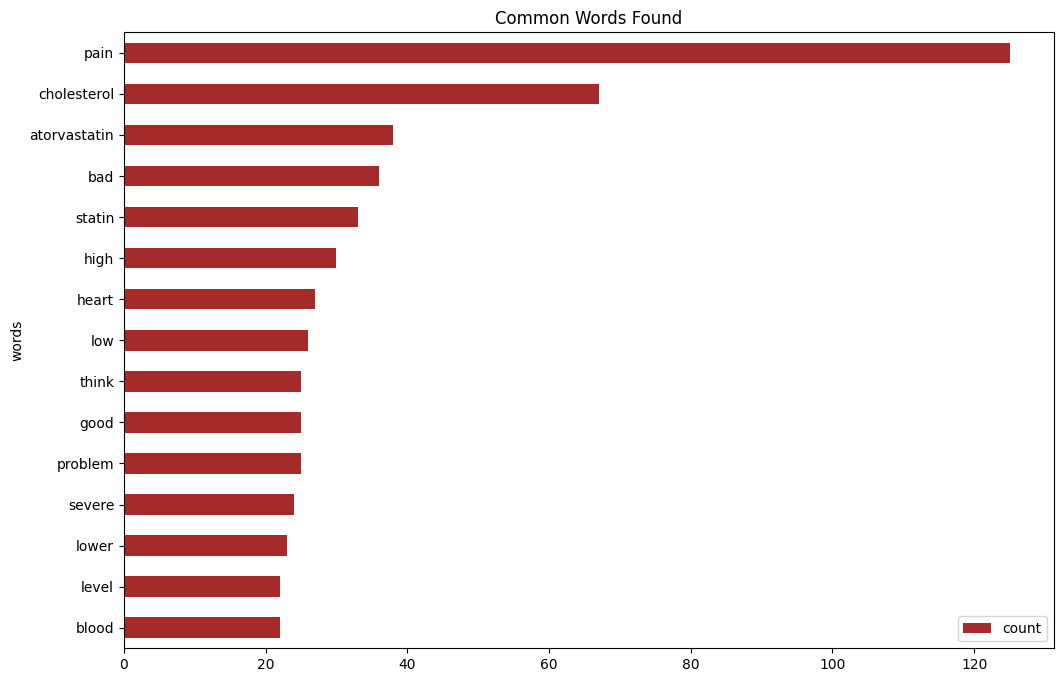

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                                            y='count',
                                            ax=ax,
                                            color="brown")
ax.set_title("Common Words Found")
plt.show()

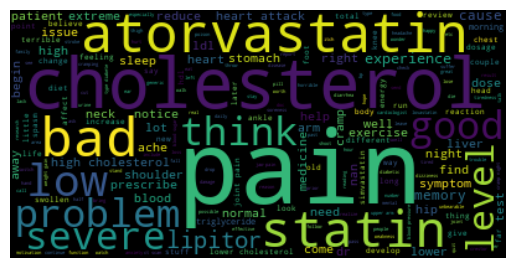

In [37]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(flattened_data))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
